<a href="https://colab.research.google.com/github/jnelly79/Colorado_Solar_Installation_Adoption_Rates_DS/blob/master/exploring_data/exploring_solar_integrated_CO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import pandas, visualization, and necessary sklearn libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import train_test_split
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Load integrated solar dataset.
df = pd.read_excel('/content/drive/My Drive/datasets/data_practicum/integration_1_CW.xlsx', sheet_name='pred7')

In [ ]:
# Display dataframe head.
df.head()

,Years,Total_emissions_wforecast,Total_emissions_wforecast_aleviated_emissions,Solar_kWh_generation_residential,Solar_kWh_generation_residential_incentives,Total energy consumed by the residential sector,electric_cost,est_installed_cost_$/W,state_level_gdp,est_annual_installed_capacity,est_annual_install_cap_after_incentives,est_cumul_installed_capacity,est_cumul_installed_capacity_after_incentives,cumul_est_roofs,cumul_est_roofs_after_incentives,est_pct_chng,est_pct_chng_after_incentives,adoption_rates,adoption_rates_incentives
0,2010,7900000.0,7900000.0,49000000.0,49000000.0,352315000000000,32.35,7.34,2.551405e+11,18.65,18.65,18.65,18.65,3390.909091,3390.909091,0.000000,0.000000,0.000000,0.000000
1,2011,7900000.0,7900000.0,65000000.0,65000000.0,354262000000000,33.02,6.44,2.644316e+11,13.80,13.80,32.45,32.45,5900.000000,5900.000000,0.739946,0.739946,0.002509,0.002509
2,2012,7100000.0,7100000.0,88000000.0,88000000.0,334949000000000,33.58,4.55,2.735195e+11,17.70,17.70,50.15,50.15,9118.181818,9118.181818,0.545455,0.545455,0.003218,0.003218
3,2013,8200000.0,8200000.0,124000000.0,124000000.0,363368000000000,34.96,3.97,2.883052e+11,28.20,28.20,78.35,78.35,14245.454550,14245.454550,0.562313,0.562313,0.005127,0.005127
4,2014,8100000.0,8100000.0,177000000.0,177000000.0,353334000000000,35.70,3.49,3.065711e+11,41.80,41.80,120.15,120.15,21845.454550,21845.454550,0.533504,0.533504,0.007600,0.007600


In [ ]:
# display dataframe shape.
df.shape

(16, 19)

In [ ]:
# Display dataframe info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 19 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Years                                            16 non-null     int64  
 1   Total_emissions_wforecast                        16 non-null     float64
 2   Total_emissions_wforecast_aleviated_emissions    16 non-null     float64
 3   Solar_kWh_generation_residential                 16 non-null     float64
 4   Solar_kWh_generation_residential_incentives      16 non-null     float64
 5   Total energy consumed by the residential sector  16 non-null     int64  
 6   electric_cost                                    16 non-null     float64
 7   est_installed_cost_$/W                           16 non-null     float64
 8   state_level_gdp                                  16 non-null     float64
 9   est_annual_installed_capacity     

In [ ]:
# Display dataframe basic statistics.
df.describe()

,Years,Total_emissions_wforecast,Total_emissions_wforecast_aleviated_emissions,Solar_kWh_generation_residential,Solar_kWh_generation_residential_incentives,Total energy consumed by the residential sector,electric_cost,est_installed_cost_$/W,state_level_gdp,est_annual_installed_capacity,est_annual_install_cap_after_incentives,est_cumul_installed_capacity,est_cumul_installed_capacity_after_incentives,cumul_est_roofs,cumul_est_roofs_after_incentives,est_pct_chng,est_pct_chng_after_incentives,adoption_rates,adoption_rates_incentives
count,16.000000,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,16.000000,16.000000,1.600000e+01,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,2017.500000,7.444643e+06,6.758605e+06,3.187798e+08,5.132835e+08,3.465383e+14,35.126259,2.565576,3.526228e+11,54.154404,76.307978,342.437795,415.278152,62261.417359,75505.118615,0.285325,0.311026,0.009634,0.013662
std,4.760952,3.818590e+05,1.197875e+06,1.870458e+08,4.186798e+08,6.703762e+12,1.268899,2.284838,6.477161e+10,27.324586,54.799676,276.259252,385.453749,50228.954859,70082.499803,0.204177,0.190719,0.005322,0.010234
min,2010.000000,6.989286e+06,4.308901e+06,4.900000e+07,4.900000e+07,3.349490e+14,32.350000,0.001000,2.551405e+11,13.800000,13.800000,18.650000,18.650000,3390.909091,3390.909091,0.000000,0.000000,0.000000,0.000000
25%,2013.750000,7.156250e+06,6.016426e+06,1.637500e+08,1.637500e+08,3.428375e+14,34.601454,0.398312,3.020046e+11,33.536358,33.536358,109.700000,109.700000,19945.454550,19945.454550,0.137061,0.185912,0.006098,0.006098
50%,2017.500000,7.326786e+06,7.092946e+06,3.276964e+08,3.907208e+08,3.449800e+14,35.455000,2.770000,3.547127e+11,55.104952,55.104952,277.831367,277.831367,50514.793940,50514.793940,0.226600,0.253368,0.010019,0.010019
75%,2021.250000,7.600000e+06,7.600000e+06,4.658780e+08,8.287569e+08,3.493098e+14,35.950586,3.610000,4.036095e+11,74.624632,123.003070,547.790263,669.292235,99598.229568,121689.497200,0.391246,0.391246,0.013568,0.022364
max,2025.000000,8.200000e+06,8.200000e+06,6.129762e+08,1.310891e+09,3.633680e+14,36.774913,7.340000,4.545963e+11,105.642972,182.867985,866.470460,1220.927655,157540.083600,221986.846400,0.739946,0.739946,0.019208,0.033249


(array([1., 2., 1., 3., 1., 1., 2., 3., 1., 1.]),
 array([0.        , 0.00192078, 0.00384156, 0.00576234, 0.00768313,
        0.00960391, 0.01152469, 0.01344547, 0.01536625, 0.01728703,
        0.01920781]),
 <a list of 10 Patch objects>)

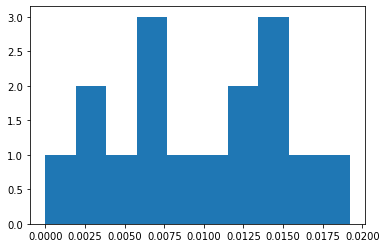

In [ ]:
# Plot hisotgrams of adoption_rates.
n_bins = 10
plt.hist(df['adoption_rates'], n_bins)

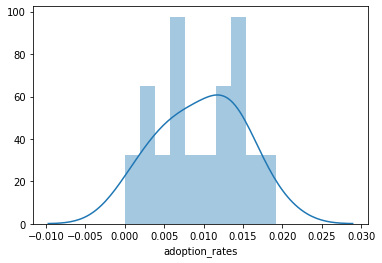

In [ ]:
# Display distribution plot of adoption_rates.
sns.distplot(df['adoption_rates'], bins=10)

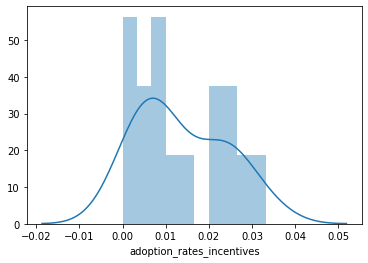

In [ ]:
# Display distribtuion plot of adoption rate incentives. 
sns.distplot(df['adoption_rates_incentives'], bins=10)

In [ ]:
# Select only the Dtype float64 and int64 of features in the dataframe.
solar_num = df.select_dtypes(include=['float64','int64'])
solar_num.head()

,Years,Total_emissions_wforecast,Total_emissions_wforecast_aleviated_emissions,Solar_kWh_generation_residential,Solar_kWh_generation_residential_incentives,Total energy consumed by the residential sector,electric_cost,est_installed_cost_$/W,state_level_gdp,est_annual_installed_capacity,est_annual_install_cap_after_incentives,est_cumul_installed_capacity,est_cumul_installed_capacity_after_incentives,cumul_est_roofs,cumul_est_roofs_after_incentives,est_pct_chng,est_pct_chng_after_incentives,adoption_rates,adoption_rates_incentives
0,2010,7900000.0,7900000.0,49000000.0,49000000.0,352315000000000,32.35,7.34,2.551405e+11,18.65,18.65,18.65,18.65,3390.909091,3390.909091,0.000000,0.000000,0.000000,0.000000
1,2011,7900000.0,7900000.0,65000000.0,65000000.0,354262000000000,33.02,6.44,2.644316e+11,13.80,13.80,32.45,32.45,5900.000000,5900.000000,0.739946,0.739946,0.002509,0.002509
2,2012,7100000.0,7100000.0,88000000.0,88000000.0,334949000000000,33.58,4.55,2.735195e+11,17.70,17.70,50.15,50.15,9118.181818,9118.181818,0.545455,0.545455,0.003218,0.003218
3,2013,8200000.0,8200000.0,124000000.0,124000000.0,363368000000000,34.96,3.97,2.883052e+11,28.20,28.20,78.35,78.35,14245.454550,14245.454550,0.562313,0.562313,0.005127,0.005127
4,2014,8100000.0,8100000.0,177000000.0,177000000.0,353334000000000,35.70,3.49,3.065711e+11,41.80,41.80,120.15,120.15,21845.454550,21845.454550,0.533504,0.533504,0.007600,0.007600


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f51097e2cf8>,
      dtype=object)

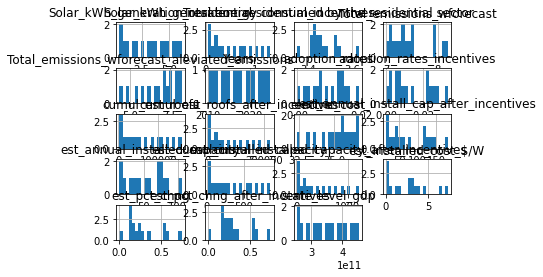

In [ ]:
# Display all the float64 and int64 histograms.
solar_num.hist(bins=20)

In [ ]:
# Get correlation with adoption rates feature.
adopt_rate_cor = solar_num.corr()['adoption_rates']
# Selecting highly correlated features with adoption rates and display.
relevant_features = adopt_rate_cor[adopt_rate_cor>0.5]
relevant_features

Years                                            0.969220
Solar_kWh_generation_residential                 0.964168
Solar_kWh_generation_residential_incentives      0.929946
electric_cost                                    0.820672
state_level_gdp                                  0.969144
est_annual_installed_capacity                    0.988772
est_annual_install_cap_after_incentives          0.931272
est_cumul_installed_capacity                     0.938054
est_cumul_installed_capacity_after_incentives    0.901856
cumul_est_roofs                                  0.938054
cumul_est_roofs_after_incentives                 0.901856
adoption_rates                                   1.000000
adoption_rates_incentives                        0.946671
Name: adoption_rates, dtype: float64

In [ ]:
# Get correlation with adoption rates incentives feature.
adopt_rate_cor = solar_num.corr()['adoption_rates_incentives']
# Selecting highly correlated features with adoption rates incentives and display.
relevant_features = adopt_rate_cor[adopt_rate_cor>0.5]
relevant_features

Years                                            0.963599
Solar_kWh_generation_residential                 0.960256
Solar_kWh_generation_residential_incentives      0.978318
electric_cost                                    0.784066
state_level_gdp                                  0.963280
est_annual_installed_capacity                    0.953281
est_annual_install_cap_after_incentives          0.996834
est_cumul_installed_capacity                     0.978577
est_cumul_installed_capacity_after_incentives    0.967353
cumul_est_roofs                                  0.978577
cumul_est_roofs_after_incentives                 0.967353
adoption_rates                                   0.946671
adoption_rates_incentives                        1.000000
Name: adoption_rates_incentives, dtype: float64

In [ ]:
# Display all correlations with incentives.
adopt_rate_cor

Years                                              0.963599
Total_emissions_wforecast                         -0.708926
Total_emissions_wforecast_aleviated_emissions     -0.934962
Solar_kWh_generation_residential                   0.960256
Solar_kWh_generation_residential_incentives        0.978318
Total energy consumed by the residential sector   -0.517288
electric_cost                                      0.784066
est_installed_cost_$/W                            -0.914999
state_level_gdp                                    0.963280
est_annual_installed_capacity                      0.953281
est_annual_install_cap_after_incentives            0.996834
est_cumul_installed_capacity                       0.978577
est_cumul_installed_capacity_after_incentives      0.967353
cumul_est_roofs                                    0.978577
cumul_est_roofs_after_incentives                   0.967353
est_pct_chng                                      -0.552428
est_pct_chng_after_incentives           

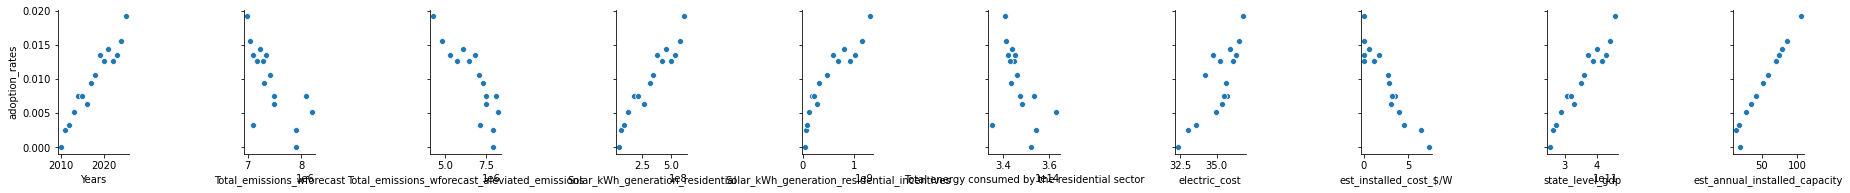

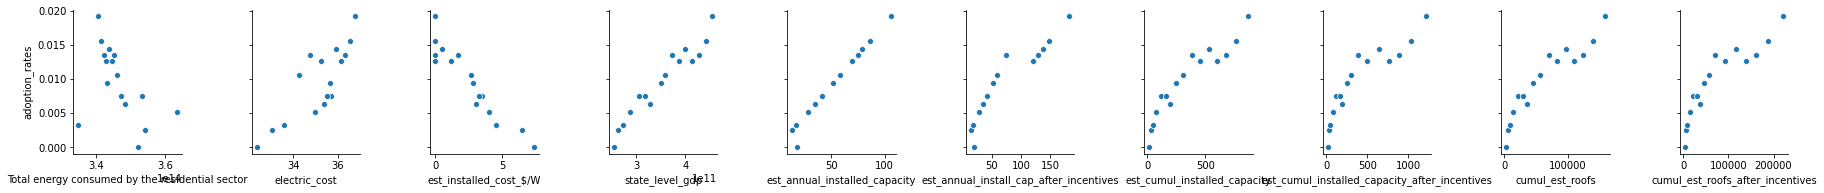

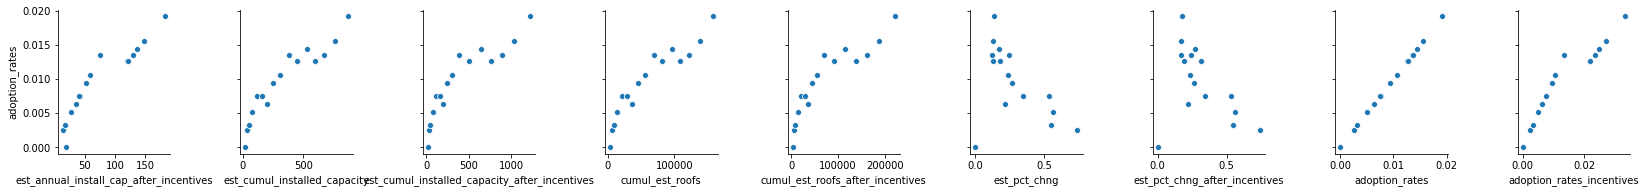

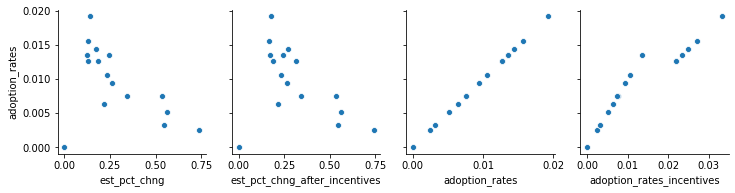

In [ ]:
# Display correlation scatterplots using pairplot.
for i in range(0,len(solar_num.columns),5):
  sns.pairplot(solar_num, y_vars=['adoption_rates'],x_vars=solar_num.columns[i:i+10])

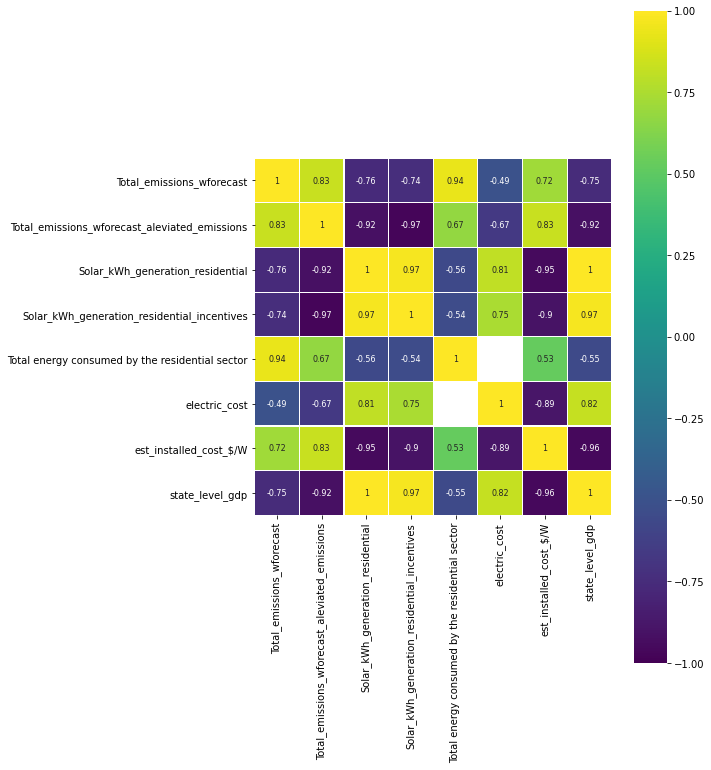

In [ ]:
# Display significant correlation in plot heatmap
corr = solar_num.drop(['adoption_rates','adoption_rates_incentives', 'est_annual_installed_capacity','est_annual_install_cap_after_incentives',
                       'Years', 'est_cumul_installed_capacity','est_cumul_installed_capacity_after_incentives','cumul_est_roofs','cumul_est_roofs_after_incentives',
                       'est_pct_chng','est_pct_chng_after_incentives'],axis=1).corr()
plt.figure(figsize=(8, 12))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size":8}, square=True);

In [ ]:
"""
Drop highly correlated features with the target features to scan pvalues to
calculate optimal features. 
"""
X = df.drop(['adoption_rates','adoption_rates_incentives', 'est_annual_installed_capacity','est_annual_install_cap_after_incentives',
                       'Years', 'est_cumul_installed_capacity','est_cumul_installed_capacity_after_incentives','cumul_est_roofs','cumul_est_roofs_after_incentives',
                       'est_pct_chng','est_pct_chng_after_incentives'],axis=1)
y = df['adoption_rates']

In [ ]:
# Adding constant column of ones, mandatory for sm.OLS model.
X_1 = sm.add_constant(X)
# Fitting sm.OLS model and display.
model = sm.OLS(y,X_1).fit()
model.pvalues

const                                              0.933657
Total_emissions_wforecast                          0.746780
Total_emissions_wforecast_aleviated_emissions      0.362450
Solar_kWh_generation_residential                   0.239320
Solar_kWh_generation_residential_incentives        0.441719
Total energy consumed by the residential sector    0.101488
electric_cost                                      0.933657
est_installed_cost_$/W                             0.933657
state_level_gdp                                    0.175906
dtype: float64

In [ ]:
""" 
Use Backward Elimination to get the most relevant commons with the lowest 
plevels.
"""
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Total energy consumed by the residential sector', 'state_level_gdp']


In [ ]:
# Drop the same features as before with the pvalue calculation.
X = df.drop(['adoption_rates','adoption_rates_incentives', 'est_annual_installed_capacity','est_annual_install_cap_after_incentives',
                       'Years', 'est_cumul_installed_capacity','est_cumul_installed_capacity_after_incentives','cumul_est_roofs','cumul_est_roofs_after_incentives',
                       'est_pct_chng','est_pct_chng_after_incentives'],axis=1)
y = df['adoption_rates']

In [ ]:
# Define a linear regression model to prep for RFE scoring.
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True False  True  True  True]
[1 1 1 1 2 1 1 1]


In [ ]:
# Number of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 1
Score with 1 features: 0.803813


In [ ]:
# Display the optimum number of features with RFE.
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 1)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['est_installed_cost_$/W'], dtype='object')
